In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.duplicated().sum()

np.int64(0)

In [7]:
dataset["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
dataset["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
dataset["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
dataset.drop(columns=["RowNumber","CustomerId","Surname"],inplace= True)

In [11]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
dataset=pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [13]:
cols = ["Geography_Germany", "Geography_Spain", "Gender_Male"]
dataset[cols] = dataset[cols].astype(int)

In [14]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


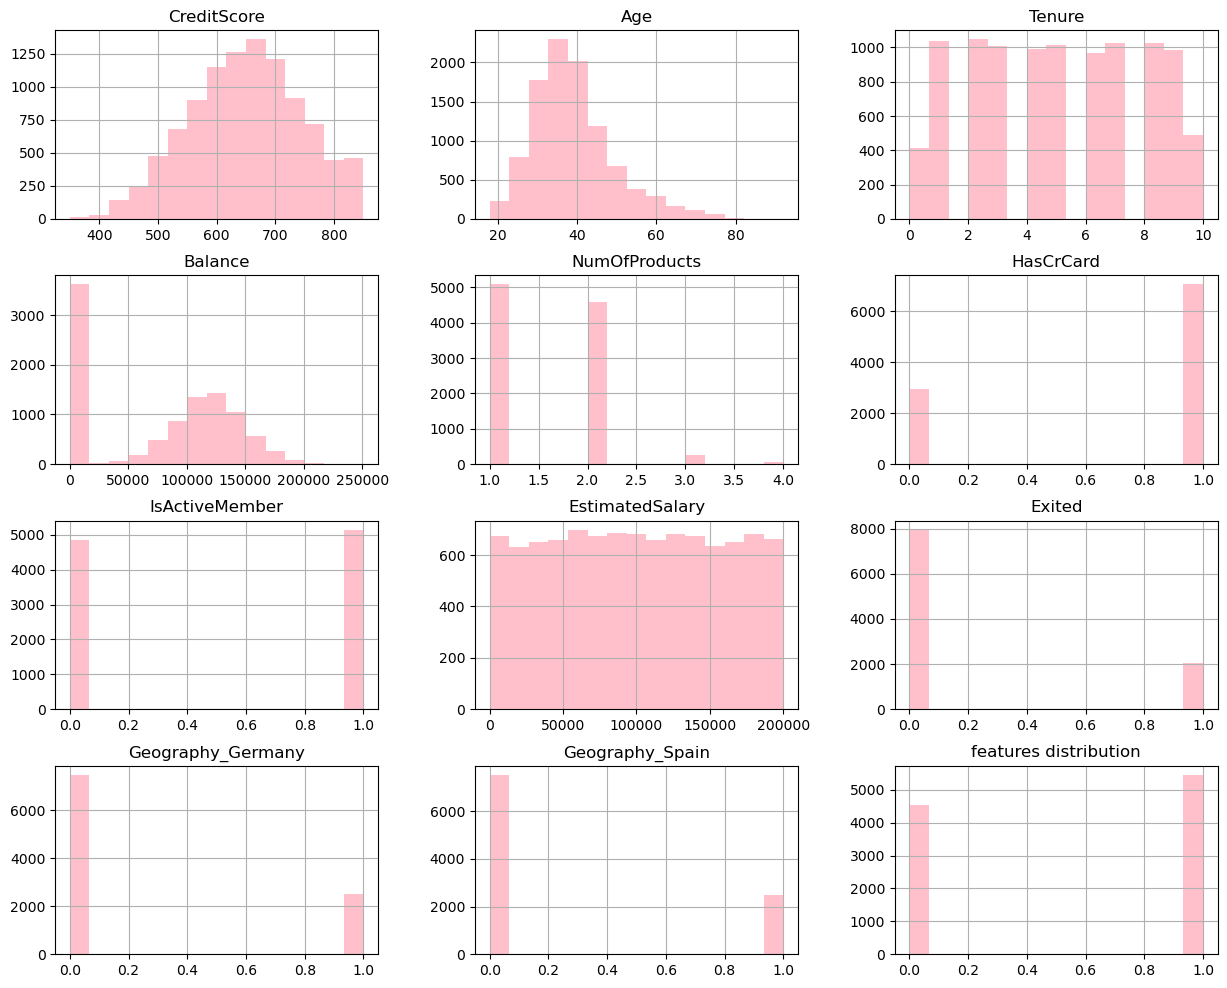

In [19]:
dataset.hist(figsize=(15,12), bins=15, color="pink")
plt.title("features distribution")
plt.show()

In [25]:
x= dataset.drop(columns=["Exited"])
y= dataset["Exited"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaled= StandardScaler()
x_train_scaled= scaled.fit_transform(x_train)
x_test_scaled= scaled.fit_transform(x_test)

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from tensorflow.keras import initializers

In [40]:
model= Sequential()

In [43]:
model.add(Dense(11, activation='relu',input_dim=11, kernel_initializer='he_normal'))
model.add(Dense(11,activation="relu", kernel_initializer="he_normal" ))
model.add(Dense(1,activation="sigmoid"))

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss="binary_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [46]:
history= model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7648 - loss: 0.5200 - val_accuracy: 0.8075 - val_loss: 0.4582
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4572 - val_accuracy: 0.8188 - val_loss: 0.4325
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8070 - loss: 0.4369 - val_accuracy: 0.8263 - val_loss: 0.4164
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8177 - loss: 0.4209 - val_accuracy: 0.8269 - val_loss: 0.4054
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8291 - loss: 0.4062 - val_accuracy: 0.8425 - val_loss: 0.3918
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8389 - loss: 0.3913 - val_accuracy: 0.8388 - val_loss: 0.3819
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3777 - val_accuracy: 0.8469 - val_loss: 0.3706
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8477 - loss: 0.3679 - val_acc

In [47]:
history.history

{'accuracy': [0.764843761920929,
  0.7967187762260437,
  0.8070312738418579,
  0.8176562786102295,
  0.8290625214576721,
  0.8389062285423279,
  0.8432812690734863,
  0.84765625,
  0.8531249761581421,
  0.8556249737739563,
  0.8564062714576721,
  0.8560937643051147,
  0.8564062714576721,
  0.8579687476158142,
  0.8579687476158142,
  0.8576562404632568,
  0.859375,
  0.8590624928474426,
  0.8589062690734863,
  0.8590624928474426,
  0.8595312237739563,
  0.8618749976158142,
  0.8600000143051147,
  0.8623437285423279,
  0.8606250286102295,
  0.8604687452316284,
  0.8628125190734863,
  0.864062488079071,
  0.8654687404632568,
  0.8650000095367432,
  0.8648437261581421,
  0.8642187714576721,
  0.8634374737739563,
  0.8645312786102295,
  0.8659374713897705,
  0.8642187714576721,
  0.8639062643051147,
  0.8645312786102295,
  0.8643749952316284,
  0.8646875023841858,
  0.8643749952316284,
  0.867968738079071,
  0.8646875023841858,
  0.8656250238418579,
  0.8653125166893005,
  0.863749980926513

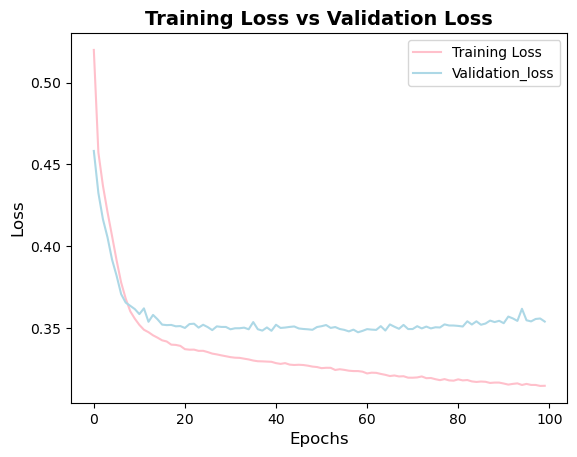

In [48]:
plt.plot(history.history["loss"],label='Training Loss', color='pink')
plt.plot(history.history["val_loss"],label='Validation_loss', color="lightblue")
plt.title('Training Loss vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right')
plt.show()

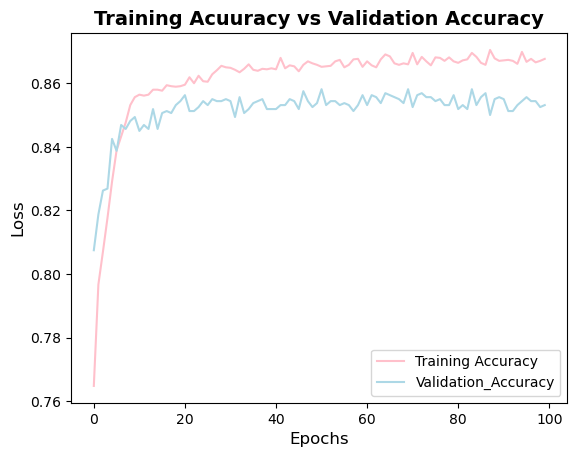

In [49]:
plt.plot(history.history["accuracy"],label='Training Accuracy', color='pink')
plt.plot(history.history["val_accuracy"],label='Validation_Accuracy', color="lightblue")
plt.title('Training Acuuracy vs Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [50]:
model.layers[0].get_weights()

[array([[ 0.31253237,  0.4519982 ,  0.30233786, -0.01398383, -0.65968317,
         -0.03297834, -0.06945591, -0.00714557,  0.01705543, -0.15559901,
         -0.53337955],
        [-0.53312516,  0.21375465, -0.23988087,  0.12536411,  0.3684862 ,
         -0.66694325,  0.34421816, -0.6374359 ,  0.9268048 ,  0.79575354,
          1.1597363 ],
        [ 0.21789154,  0.58211726,  0.2938333 , -0.05335892, -0.00990366,
          0.31034932,  0.34869394, -0.05505147,  0.09576467,  0.09654366,
         -0.18516418],
        [ 0.3183601 , -0.4691486 , -0.3480406 ,  0.33757257,  0.23719059,
          0.2940156 ,  0.50745755, -0.17312884, -0.49400902,  0.28058523,
         -0.04164498],
        [ 0.28413993, -1.2546405 , -0.3209597 ,  0.78263086, -0.23575002,
         -0.1481313 , -0.2934284 ,  0.6306044 ,  0.15510444,  0.96203107,
         -1.2273449 ],
        [-0.14514954,  0.04441833, -0.89733994,  0.1753722 , -0.24651377,
          1.1325535 ,  0.77242833, -0.22407797,  0.67135966,  0.1807891

In [51]:
model.layers[1].get_weights()

[array([[ 2.55244076e-01, -4.47420627e-01,  7.32118428e-01,
          5.37735879e-01, -4.31893557e-01,  1.95736021e-01,
         -4.15304780e-01,  1.57899559e-02,  5.56847990e-01,
          1.48729727e-01, -2.36445398e-04],
        [ 1.86394975e-01,  4.02182847e-01,  3.14913690e-01,
          1.64834917e-01,  3.61223310e-01,  3.20204407e-01,
         -7.47720063e-01, -1.51522085e-01,  8.12943932e-03,
         -1.43709376e-01,  6.40924335e-01],
        [-1.86297268e-01,  1.93599556e-02, -1.20886338e+00,
          1.13008291e-01,  9.41712335e-02,  4.47556406e-01,
          5.25187030e-02, -4.92285013e-01,  2.43218929e-01,
         -3.82768214e-01, -4.78076994e-01],
        [ 6.90824986e-01,  5.26027642e-02, -2.18978465e-01,
          2.88196564e-01, -7.24604309e-01, -5.88029206e-01,
         -3.89325231e-01,  1.03184092e+00, -7.37069607e-01,
          5.27087271e-01,  3.11669052e-01],
        [-3.61846507e-01,  7.09857106e-01, -4.24359530e-01,
          1.78145334e-01, -8.25240910e-02, -

In [52]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [53]:
y_pred=np.where(y_log>0.5,1,0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8555

In [60]:
# 1. Single row pick karein
single_row = x.iloc[[2]] 

# 2. Scale aur Predict karein
scaled_row = scaler.transform(single_row)
prediction_prob = model.predict(scaled_row)[0][0] # 0 se 1 ke beech probability
predicted_class = 1 if prediction_prob > 0.5 else 0

# 3. Actual Value
actual_class = y.iloc[2]

print(f"--- Churn Model: Row 4 Test ---")
print(f"Actual Class:    {actual_class}")
print(f"Predicted Class: {predicted_class} (Prob: {prediction_prob:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
--- Churn Model: Row 4 Test ---
Actual Class:    1
Predicted Class: 1 (Prob: 0.9837)


In [61]:
import pickle
# Scaler save karein
pickle.dump(scaled, open('scaler1.pkl', 'wb')) 
# Model save karein
model.save('churn_model.h5')